In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

df = pd.read_excel('Cell-Cycle-Set.xlsx')
# curate to drop columns with missing values
df.dropna(inplace=True) 

Generate a histogram of one of the cell cycle stages of the RNA and protein distribution. Do you notice anything interesting with regards to the mean/variance of the distribution?

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 0, 'Mean G1 Expression')

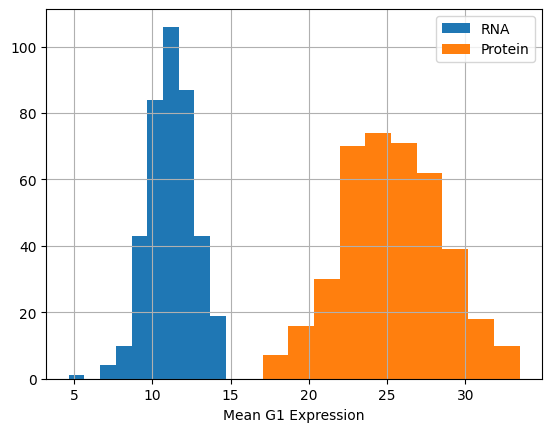

In [5]:
fig1, ax1 = plt.subplots()

#.hist draws histogram on a pandas series using matplotlib
#default bin size is 10
df.mean_RNA_G1.hist(ax=ax1, label='RNA', bins = 10)
df.mean_protein_G1.hist(ax=ax1, label='Protein', bins = 10)

#puts a colour coded legend of what each data set is
ax1.legend()

#set the label of the x axis
ax1.set_xlabel('Mean G1 Expression')

#show the figure that we have created
#fig1

Text(0.5, 0, 'Mean G2 Expression')

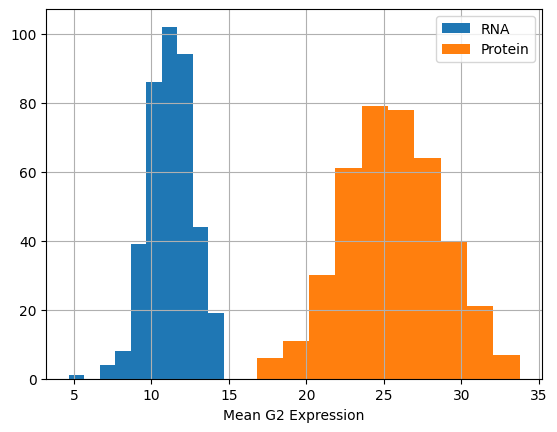

In [3]:
fig3, ax3 = plt.subplots()
df.mean_RNA_G2.hist(ax=ax3, label='RNA')
df.mean_protein_G2.hist(ax=ax3, label='Protein')
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?

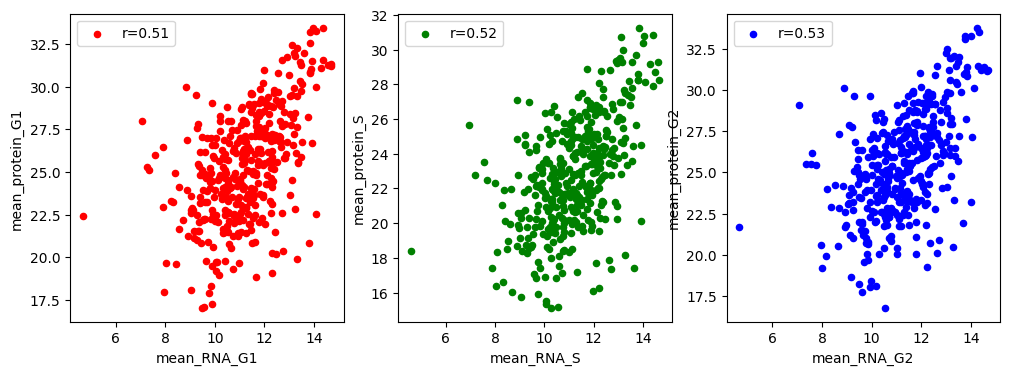

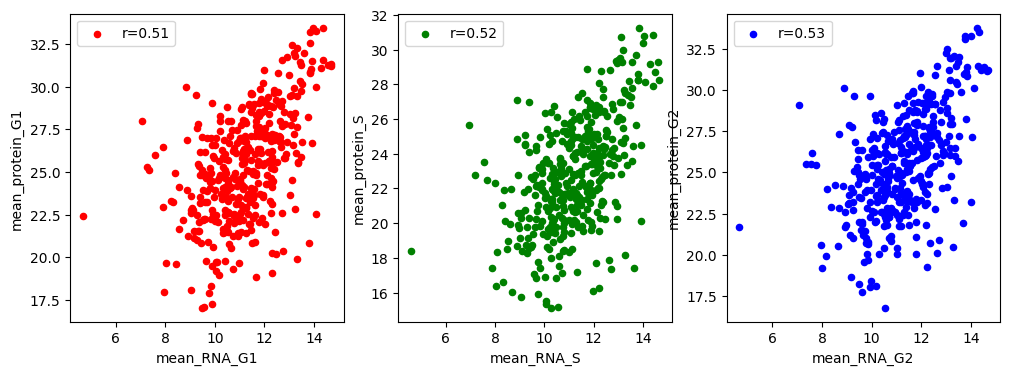

In [4]:
fig2, ax2 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[0], color='r', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[1], color='g', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[2], color='b', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
fig2